In [164]:
library(tidyverse)

In [165]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

In [184]:
dd <- read_csv("../batch_metrics_header.csv")

New names:
• `` -> `...1`
Rows: 27 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (8): NMI_cluster/label, ARI_cluster/label, iLISI, cLISI, graph_conn, pcr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [185]:
dim(dd)

[1] 27 15

In [186]:
dd[dd == 'rligerUINMF'] = 'LIGER_UINMF'

In [187]:
library(patchwork)

In [188]:
library(ggsci)

In [189]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

## Batch removal

In [190]:
dd = dd %>% mutate(homology_method = gsub("metadata_nf_ca1sub_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad|_SAMap_integrated.h5ad", "", homology_method)) %>%
arrange(desc(pcr))  %>% 
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))

## minmax scale batch scores

In [191]:
dd

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,integration_method,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5656975,0.4135054,0.395137691,0.9670832,0.7984625,0.8886293,0.5387298,0.8884972,metadata_nf_ca1sub_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_ca1sub_many_higher_expr.h5ad,species,samplename,cluster_new,LIGER,higher expression
value,0.5668864,0.4145274,0.395637548,0.9666133,0.7983010,0.8883996,0.5387755,0.8884631,metadata_nf_ca1sub_many_higher_homology_conf_LIGER_integrated.h5ad,metadata_nf_ca1sub_many_higher_homology_conf.h5ad,species,samplename,cluster_new,LIGER,stronger homology
value,0.6265002,0.4079764,0.414760043,0.9815426,0.7725666,0.8838281,0.5656998,0.8892748,metadata_nf_ca1sub_one2one_only_LIGER_integrated.h5ad,metadata_nf_ca1sub_one2one_only.h5ad,species,samplename,cluster_new,LIGER,one2one only
value,0.8538242,0.8612204,0.209313643,0.9978992,0.9299502,0.8072811,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_expr_scVI_integrated.h5ad,metadata_nf_ca1sub_many_higher_expr.h5ad,species,samplename,cluster_new,scVI,higher expression
value,0.8538242,0.8612204,0.209086740,0.9978855,0.9299502,0.8072787,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_homology_conf_scVI_integrated.h5ad,metadata_nf_ca1sub_many_higher_homology_conf.h5ad,species,samplename,cluster_new,scVI,stronger homology
value,0.8772445,0.9121077,0.206899098,0.9987225,0.9327962,0.7991693,0.5776986,0.9155032,metadata_nf_ca1sub_one2one_only_scVI_integrated.h5ad,metadata_nf_ca1sub_one2one_only.h5ad,species,samplename,cluster_new,scVI,one2one only
value,0.6833516,0.7045287,0.283649692,0.9987155,0.6877864,0.7984786,0.6301243,0.7768668,rliger_uinmf_metadata_one2one_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_one2one.h5ad,species,samplename,cluster_new,LIGER_UINMF,one2one only
value,0.6465521,0.5651254,0.260471058,0.9982215,0.7505057,0.7547369,0.6212815,0.7525359,rliger_uinmf_metadata_many_higher_expr_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_expr.h5ad,species,samplename,cluster_new,LIGER_UINMF,higher expression
value,0.6465521,0.5651254,0.259794492,0.9981808,0.7505057,0.7547339,0.6212815,0.7525359,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,rliger_uinmf_metadata_many_higher_homology_conf.h5ad,species,samplename,cluster_new,LIGER_UINMF,stronger homology


In [192]:
dd[which(dd$integration_method == 'SAMap'), 'homology_method'] = 'full'

In [193]:
dd = dd %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) 

In [194]:
ranked = dd %>% 
mutate(graph_conn_scaled = (graph_conn - min(graph_conn)) / (max(graph_conn) - min(graph_conn))) %>% 
mutate(pcr_scaled = (pcr - min(pcr)) / (max(pcr) - min(pcr))) %>% 
mutate(iLISI_scaled = (iLISI - min(iLISI)) / (max(iLISI) - min(iLISI))) %>% 
mutate(silhouette_batch_scaled = (silhouette_batch - min(silhouette_batch)) / (max(silhouette_batch) - min(silhouette_batch))) %>% 
mutate(avg_score = (graph_conn_scaled + pcr_scaled + iLISI_scaled + silhouette_batch_scaled) * 0.25) %>% 
arrange(desc(avg_score)) %>% 
mutate(cLISI_scaled = (cLISI- min(cLISI)) / (max(cLISI) - min(cLISI))) %>% 
mutate(silhouette_scaled = (silhouette - min(silhouette)) / (max(silhouette) - min(silhouette))) %>% 
mutate(NMI_scaled = (`NMI_cluster/label` - min(`NMI_cluster/label`)) / (max(`NMI_cluster/label`) - min(`NMI_cluster/label`)))  %>% 
mutate(ARI_scaled = (`ARI_cluster/label` - min(`ARI_cluster/label`)) / (max(`ARI_cluster/label`) - min(`ARI_cluster/label`)))

In [195]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.8538242,0.8612204,0.209313643,0.9978992,0.9299502,0.8072811,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.9883840,0.843449413,0.49366585,0.8865277,0.8030067,0.93707592,0.139257531,0.774964397,0.812248216
value,0.8538242,0.8612204,0.209086740,0.9978855,0.9299502,0.8072787,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9883840,0.843444732,0.49310664,0.8865277,0.8028658,0.93666604,0.139257531,0.774964397,0.812248216
value,0.8772445,0.9121077,0.206899098,0.9987225,0.9327962,0.7991693,0.5776986,0.9155032,metadata_nf_ca1sub_one2one_only_scVI_integrated.h5ad,⋯,one2one only,1.0000000,0.827838680,0.48771507,0.8834582,0.7997530,0.96173524,0.212861016,0.837957173,0.903442082
value,0.5656975,0.4135054,0.395137691,0.9670832,0.7984625,0.8886293,0.5387298,0.8884972,metadata_nf_ca1sub_many_higher_expr_LIGER_integrated.h5ad,⋯,higher expression,0.4517209,1.000000000,0.95163962,0.7370564,0.7851042,0.01407412,0.000000000,0.000000000,0.009908479
value,0.5668864,0.4145274,0.395637548,0.9666133,0.7983010,0.8883996,0.5387755,0.8884631,metadata_nf_ca1sub_many_higher_homology_conf_LIGER_integrated.h5ad,⋯,stronger homology,0.4510620,0.999557953,0.95287154,0.7368715,0.7850907,0.00000000,0.000249467,0.003197693,0.011739928
value,0.8958830,0.9259227,0.274043806,1.0000000,0.9082531,0.7312553,0.6445495,0.9056053,metadata_nf_ca1sub_many_higher_homology_conf_harmony_integrated.h5ad,⋯,stronger homology,0.8998283,0.697141477,0.65319696,0.8298006,0.7699918,1.00000000,0.578023749,0.888088459,0.928199597
value,0.6265002,0.4079764,0.414760043,0.9815426,0.7725666,0.8838281,0.5656998,0.8892748,metadata_nf_ca1sub_one2one_only_LIGER_integrated.h5ad,⋯,one2one only,0.3460278,0.990760323,1.00000000,0.7412721,0.7695151,0.44716446,0.147319582,0.163539043,0.000000000
value,0.9007590,0.9275110,0.271697054,1.0000000,0.9084547,0.7306490,0.6445679,0.9055802,metadata_nf_ca1sub_one2one_only_harmony_integrated.h5ad,⋯,one2one only,0.9006511,0.695974753,0.64741326,0.8296647,0.7684259,1.00000000,0.578124028,0.901203361,0.931046114
value,0.8990895,0.9270694,0.273263437,1.0000000,0.9070863,0.7312676,0.6445536,0.9056076,metadata_nf_ca1sub_many_higher_expr_harmony_integrated.h5ad,⋯,higher expression,0.8950660,0.697165155,0.65127370,0.8298133,0.7683295,1.00000000,0.578045807,0.896713057,0.930254743


In [196]:
## set the order of levels
ranked$homology_method = factor(ranked$homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))

In [197]:
ranked

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.8538242,0.8612204,0.209313643,0.9978992,0.9299502,0.8072811,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.9883840,0.843449413,0.49366585,0.8865277,0.8030067,0.93707592,0.139257531,0.774964397,0.812248216
value,0.8538242,0.8612204,0.209086740,0.9978855,0.9299502,0.8072787,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9883840,0.843444732,0.49310664,0.8865277,0.8028658,0.93666604,0.139257531,0.774964397,0.812248216
value,0.8772445,0.9121077,0.206899098,0.9987225,0.9327962,0.7991693,0.5776986,0.9155032,metadata_nf_ca1sub_one2one_only_scVI_integrated.h5ad,⋯,one2one only,1.0000000,0.827838680,0.48771507,0.8834582,0.7997530,0.96173524,0.212861016,0.837957173,0.903442082
value,0.5656975,0.4135054,0.395137691,0.9670832,0.7984625,0.8886293,0.5387298,0.8884972,metadata_nf_ca1sub_many_higher_expr_LIGER_integrated.h5ad,⋯,higher expression,0.4517209,1.000000000,0.95163962,0.7370564,0.7851042,0.01407412,0.000000000,0.000000000,0.009908479
value,0.5668864,0.4145274,0.395637548,0.9666133,0.7983010,0.8883996,0.5387755,0.8884631,metadata_nf_ca1sub_many_higher_homology_conf_LIGER_integrated.h5ad,⋯,stronger homology,0.4510620,0.999557953,0.95287154,0.7368715,0.7850907,0.00000000,0.000249467,0.003197693,0.011739928
value,0.8958830,0.9259227,0.274043806,1.0000000,0.9082531,0.7312553,0.6445495,0.9056053,metadata_nf_ca1sub_many_higher_homology_conf_harmony_integrated.h5ad,⋯,stronger homology,0.8998283,0.697141477,0.65319696,0.8298006,0.7699918,1.00000000,0.578023749,0.888088459,0.928199597
value,0.6265002,0.4079764,0.414760043,0.9815426,0.7725666,0.8838281,0.5656998,0.8892748,metadata_nf_ca1sub_one2one_only_LIGER_integrated.h5ad,⋯,one2one only,0.3460278,0.990760323,1.00000000,0.7412721,0.7695151,0.44716446,0.147319582,0.163539043,0.000000000
value,0.9007590,0.9275110,0.271697054,1.0000000,0.9084547,0.7306490,0.6445679,0.9055802,metadata_nf_ca1sub_one2one_only_harmony_integrated.h5ad,⋯,one2one only,0.9006511,0.695974753,0.64741326,0.8296647,0.7684259,1.00000000,0.578124028,0.901203361,0.931046114
value,0.8990895,0.9270694,0.273263437,1.0000000,0.9070863,0.7312676,0.6445536,0.9056076,metadata_nf_ca1sub_many_higher_expr_harmony_integrated.h5ad,⋯,higher expression,0.8950660,0.697165155,0.65127370,0.8298133,0.7683295,1.00000000,0.578045807,0.896713057,0.930254743


In [198]:
head(ranked)

...1,NMI_cluster/label,ARI_cluster/label,iLISI,cLISI,graph_conn,pcr,silhouette,silhouette_batch,input_h5ad,⋯,homology_method,graph_conn_scaled,pcr_scaled,iLISI_scaled,silhouette_batch_scaled,avg_score,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
value,0.8538242,0.8612204,0.2093136,0.9978992,0.9299502,0.8072811,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_expr_scVI_integrated.h5ad,⋯,higher expression,0.9883840,0.8434494,0.4936659,0.8865277,0.8030067,0.93707592,0.139257531,0.774964397,0.812248216
value,0.8538242,0.8612204,0.2090867,0.9978855,0.9299502,0.8072787,0.5642239,0.9160694,metadata_nf_ca1sub_many_higher_homology_conf_scVI_integrated.h5ad,⋯,stronger homology,0.9883840,0.8434447,0.4931066,0.8865277,0.8028658,0.93666604,0.139257531,0.774964397,0.812248216
value,0.8772445,0.9121077,0.2068991,0.9987225,0.9327962,0.7991693,0.5776986,0.9155032,metadata_nf_ca1sub_one2one_only_scVI_integrated.h5ad,⋯,one2one only,1.0000000,0.8278387,0.4877151,0.8834582,0.7997530,0.96173524,0.212861016,0.837957173,0.903442082
value,0.5656975,0.4135054,0.3951377,0.9670832,0.7984625,0.8886293,0.5387298,0.8884972,metadata_nf_ca1sub_many_higher_expr_LIGER_integrated.h5ad,⋯,higher expression,0.4517209,1.0000000,0.9516396,0.7370564,0.7851042,0.01407412,0.000000000,0.000000000,0.009908479
value,0.5668864,0.4145274,0.3956375,0.9666133,0.7983010,0.8883996,0.5387755,0.8884631,metadata_nf_ca1sub_many_higher_homology_conf_LIGER_integrated.h5ad,⋯,stronger homology,0.4510620,0.9995580,0.9528715,0.7368715,0.7850907,0.00000000,0.000249467,0.003197693,0.011739928
value,0.8958830,0.9259227,0.2740438,1.0000000,0.9082531,0.7312553,0.6445495,0.9056053,metadata_nf_ca1sub_many_higher_homology_conf_harmony_integrated.h5ad,⋯,stronger homology,0.8998283,0.6971415,0.6531970,0.8298006,0.7699918,1.00000000,0.578023749,0.888088459,0.928199597


In [199]:

batch = ranked %>% arrange(avg_score) %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
ggplot(aes(x = fct_inorder(type), y = avg_score, color= integration_method)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Species mixing score', y = 'integration strategy') + ylim(0, 1.01) + scale_shape(name = 'homology method')

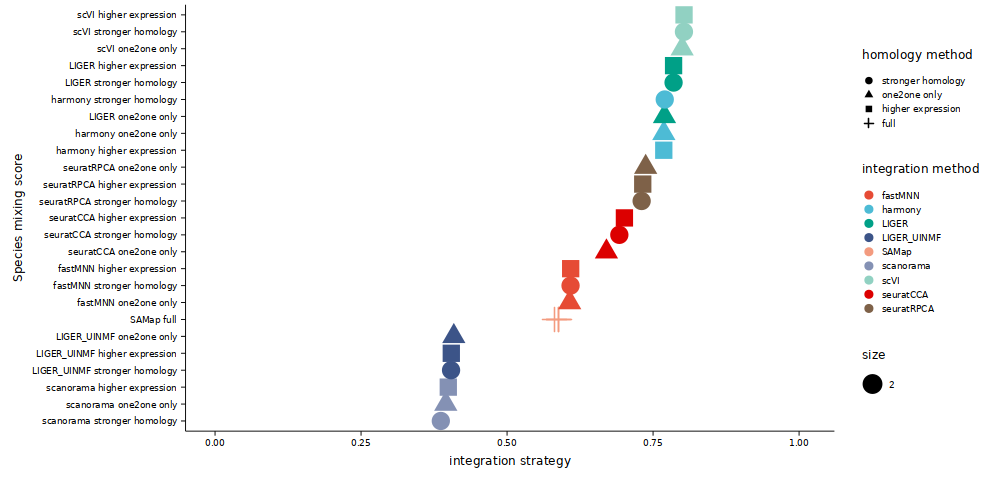

In [248]:
batch

## Biology conservation

In [249]:
cs <- read_csv("/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Franjic_hippocampus_results_final_downsampled_ca1sub/results/all_sccaf_accuracy.csv")

Rows: 3687 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): cell_type, type_label, from_species, to_species, integration_method...
dbl (6): ROC_AUC, PR_AUC, test_acc, CV_acc, adj_rand_score, pct_cell_type_kept

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [250]:
cs[cs$integration_method == 'SAMap', 'homology_method'] = 'full'
cs[cs == 'one2one'] = 'one2one_only'

In [251]:
levels(factor(cs$integration_method))
levels(factor(cs$homology_method))

[1] "fastMNN"      "harmony"      "LIGER"        "rligerUINMF"  "SAMap"       
 [6] "scanorama"    "scVI"         "seuratCCA"    "seuratRPCA"   "unintegrated"

[1] "full"

In [252]:
head(cs)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Astro,0.9949348,0.9993548,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA
CA1 Sub,0.8862277,0.9837621,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA
CA2-3,0.9577811,0.9963194,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA
CR,0.9097972,0.9997939,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA
GC,0.9986640,0.9985907,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA
InN,0.9984223,0.9998629,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,NA


In [253]:
orig = cs %>% filter(integration_method == 'unintegrated')

In [254]:
intg = cs %>% filter(integration_method != 'unintegrated') %>% filter(type_label == 'original')

In [255]:
intg = intg %>% mutate(homology_method = gsub("metadata_nf_ca1sub_|rliger_uinmf_metadata_", "", input_file)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
intg[intg$integration_method == 'SAMap', 'homology_method'] = 'full'

In [256]:
head(intg)

cell_type,ROC_AUC,PR_AUC,test_acc,CV_acc,type_label,from_species,to_species,integration_method,input_file,key_use,adj_rand_score,pct_cell_type_kept,homology_method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Astro,0.9949348,0.9993548,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression
CA1 Sub,0.8862277,0.9837621,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression
CA2-3,0.9577811,0.9963194,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression
CR,0.9097972,0.9997939,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression
GC,0.9986640,0.9985907,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression
InN,0.9984223,0.9998629,0.9350799,0.8097778,original,mmulatta,mmulatta,fastMNN,metadata_nf_ca1sub_many_higher_expr_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,higher expression


## accuracy loss

In [257]:
levels(factor(intg$from_species))

[1] "hsapiens" "mmulatta" "sscrofa"

In [258]:
acc_loss = merge(orig, intg, by = c("cell_type", "from_species"), suffixes = c("_orig", "_intg")) %>% 
mutate(acc_loss = abs(test_acc_orig - test_acc_intg))

In [259]:
head(acc_loss)

,cell_type,from_species,ROC_AUC_orig,PR_AUC_orig,test_acc_orig,CV_acc_orig,type_label_orig,to_species_orig,integration_method_orig,input_file_orig,⋯,CV_acc_intg,type_label_intg,to_species_intg,integration_method_intg,input_file_intg,key_use_intg,adj_rand_score_intg,pct_cell_type_kept_intg,homology_method_intg,acc_loss
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.4758933,original,hsapiens,LIGER,metadata_nf_ca1sub_many_higher_homology_conf_LIGER_integrated.h5ad,cluster_new,NaN,NaN,stronger homology,0.5903436949
2,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.8792644,original,hsapiens,rligerUINMF,rliger_uinmf_metadata_many_higher_homology_conf_rligerUINMF_integrated.h5ad,cluster_new,NaN,NaN,stronger homology,0.0071492404
3,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.9571406,original,hsapiens,scanorama,metadata_nf_ca1sub_one2one_only_scanorama_integrated.h5ad,cluster_new,NaN,NaN,one2one only,0.0003381397
4,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.8916321,original,hsapiens,fastMNN,metadata_nf_ca1sub_many_higher_homology_conf_fastMNN_integrated.h5ad,cluster_new,NaN,NaN,stronger homology,0.0025843538
5,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.9658071,original,hsapiens,scVI,metadata_nf_ca1sub_many_higher_expr_scVI_integrated.h5ad,cluster_new,NaN,NaN,higher expression,0.0004589039
6,Astro,hsapiens,0.9998864,0.999982,0.9918363,0.9571465,original,hsapiens,unintegrated,/nfs/research/irene/ysong/DATA/Hippocampus/Franjic_2021/final_data_used/subsampled_data/hsapiens_raw_count_final_gene_id_downsampled_ca1sub.h5ad,⋯,0.9340588,original,hsapiens,seuratCCA,metadata_nf_ca1sub_many_higher_expr_seuratCCA_integrated.h5ad,cluster_new,NaN,NaN,higher expression,0.0120764196


In [260]:
ranked_dd = ranked %>% select(integration_method, homology_method, cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled) %>% 
mutate(cLISI_scaled_rank = dense_rank(desc(cLISI_scaled))) %>% 
mutate(silhouette_scaled_rank = dense_rank(desc(silhouette_scaled))) %>%
mutate(ARI_scaled_rank = dense_rank(desc(ARI_scaled))) %>%
mutate(NMI_scaled_rank = dense_rank(desc(NMI_scaled))) %>% 
mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE)

In [261]:
## min max scale accuracy loss

acc_loss_dd = acc_loss %>% select(homology_method_intg,integration_method_intg, acc_loss) %>% mutate(integration_method_intg = gsub("rligerUINMF", "LIGER_UINMF",integration_method_intg)) %>%  
mutate(homology_method = factor(homology_method_intg, levels = c('full', "one2one only", 'higher expression', 'stronger homology'))) %>% 
group_by(integration_method_intg, homology_method) %>% 
mutate(acc_loss = ifelse(acc_loss < 0, 0, acc_loss)) %>% 
mutate(acc_avg = abs(mean(acc_loss, na.rm = TRUE))) %>% ungroup() %>% 
mutate(acc_loss_scaled = 1- ((acc_avg - min(acc_avg)) / max(acc_avg) - min(acc_avg)))%>% 
mutate(type = paste(integration_method_intg, homology_method, sep = " ")) %>% ungroup() %>% 
mutate(acc_loss_scaled_rank = dense_rank(desc(acc_loss_scaled))) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(integration_method = integration_method_intg)

In [262]:
acc_loss_dd

homology_method_intg,integration_method_intg,acc_loss,homology_method,acc_avg,acc_loss_scaled,type,acc_loss_scaled_rank,integration_method
<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<int>,<chr>
stronger homology,LIGER,0.5903436949,stronger homology,0.324371801,0.181746975,LIGER stronger homology,24,LIGER
stronger homology,LIGER_UINMF,0.0071492404,stronger homology,0.134046200,0.665999677,LIGER_UINMF stronger homology,22,LIGER_UINMF
one2one only,scanorama,0.0003381397,one2one only,0.012173922,0.976083975,scanorama one2one only,16,scanorama
stronger homology,fastMNN,0.0025843538,stronger homology,0.010759773,0.979682048,fastMNN stronger homology,14,fastMNN
higher expression,scVI,0.0004589039,higher expression,0.001991500,1.001991500,scVI higher expression,1,scVI
higher expression,seuratCCA,0.0120764196,higher expression,0.010129169,0.981286518,seuratCCA higher expression,13,seuratCCA
one2one only,seuratRPCA,0.0008936550,one2one only,0.003037384,0.999330417,seuratRPCA one2one only,4,seuratRPCA
higher expression,scanorama,0.0005072096,higher expression,0.013468238,0.972790795,scanorama higher expression,19,scanorama
one2one only,LIGER_UINMF,0.0194913412,one2one only,0.100016596,0.752582499,LIGER_UINMF one2one only,20,LIGER_UINMF


## merge acc_loss and bio metrics

In [263]:
bio_dd = merge(ranked_dd, acc_loss_dd, by = c("type", "integration_method", "homology_method"))

In [264]:
bio_dd =  bio_dd %>% 
mutate(avg_score = acc_loss_scaled * 0.8 + silhouette_scaled*0.05 + cLISI_scaled*0.05 + ARI_scaled*0.05 + NMI_scaled*0.05) %>% 
arrange(desc(avg_score)) 

In [265]:
bio_dd

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
seuratRPCA one2one only,seuratRPCA,one2one only,1.00000000,0.864931910,0.944601991,0.969256674,1,4,4,4,one2one only,seuratRPCA,0.0008936550,0.003037384,0.999330417,4,0.98840386
seuratRPCA higher expression,seuratRPCA,higher expression,1.00000000,0.853921167,0.938775378,0.962683176,1,5,5,5,higher expression,seuratRPCA,0.0022462140,0.003149233,0.999045835,5,0.98700565
seuratRPCA stronger homology,seuratRPCA,stronger homology,1.00000000,0.847211431,0.938206063,0.961551771,1,6,6,6,stronger homology,seuratRPCA,0.0006279738,0.006460416,0.990621065,7,0.97984531
seuratCCA stronger homology,seuratCCA,stronger homology,1.00000000,0.989703908,0.878291765,0.911798443,1,3,12,12,stronger homology,seuratCCA,0.0077772142,0.008966208,0.984245484,11,0.97638609
seuratCCA one2one only,seuratCCA,one2one only,1.00000000,1.000000000,0.881618463,0.913762703,1,1,10,10,one2one only,seuratCCA,0.0079221312,0.009592735,0.982651387,12,0.97589017
seuratCCA higher expression,seuratCCA,higher expression,1.00000000,0.993840740,0.879780486,0.913640768,1,2,11,11,higher expression,seuratCCA,0.0120764196,0.010129169,0.981286518,13,0.97439231
fastMNN higher expression,fastMNN,higher expression,1.00000000,0.556756458,0.995739746,1.000000000,1,11,1,2,higher expression,fastMNN,0.0019563800,0.008727643,0.984852473,9,0.96550679
fastMNN one2one only,fastMNN,one2one only,1.00000000,0.556507742,0.979522245,0.989001044,1,12,3,3,one2one only,fastMNN,0.0025843538,0.008957089,0.984268685,10,0.96366650
harmony one2one only,harmony,one2one only,1.00000000,0.578124028,0.901203361,0.931046114,1,7,7,7,one2one only,harmony,0.0028258822,0.011843299,0.976925189,15,0.95205883


In [266]:
bio = bio_dd %>%
ggplot(aes(x = fct_inorder(type), y = acc_loss_scaled, color= integration_method_intg)) + 
geom_point(aes(shape = fct_inorder(homology_method), size = 2)) + coord_flip() + common_0x + 
scale_color_npg(name = 'integration method') +
labs(x = 'Biology conservation score', y = 'integration strategy') + scale_shape(name = 'homology method') 

In [267]:
library(cowplot)

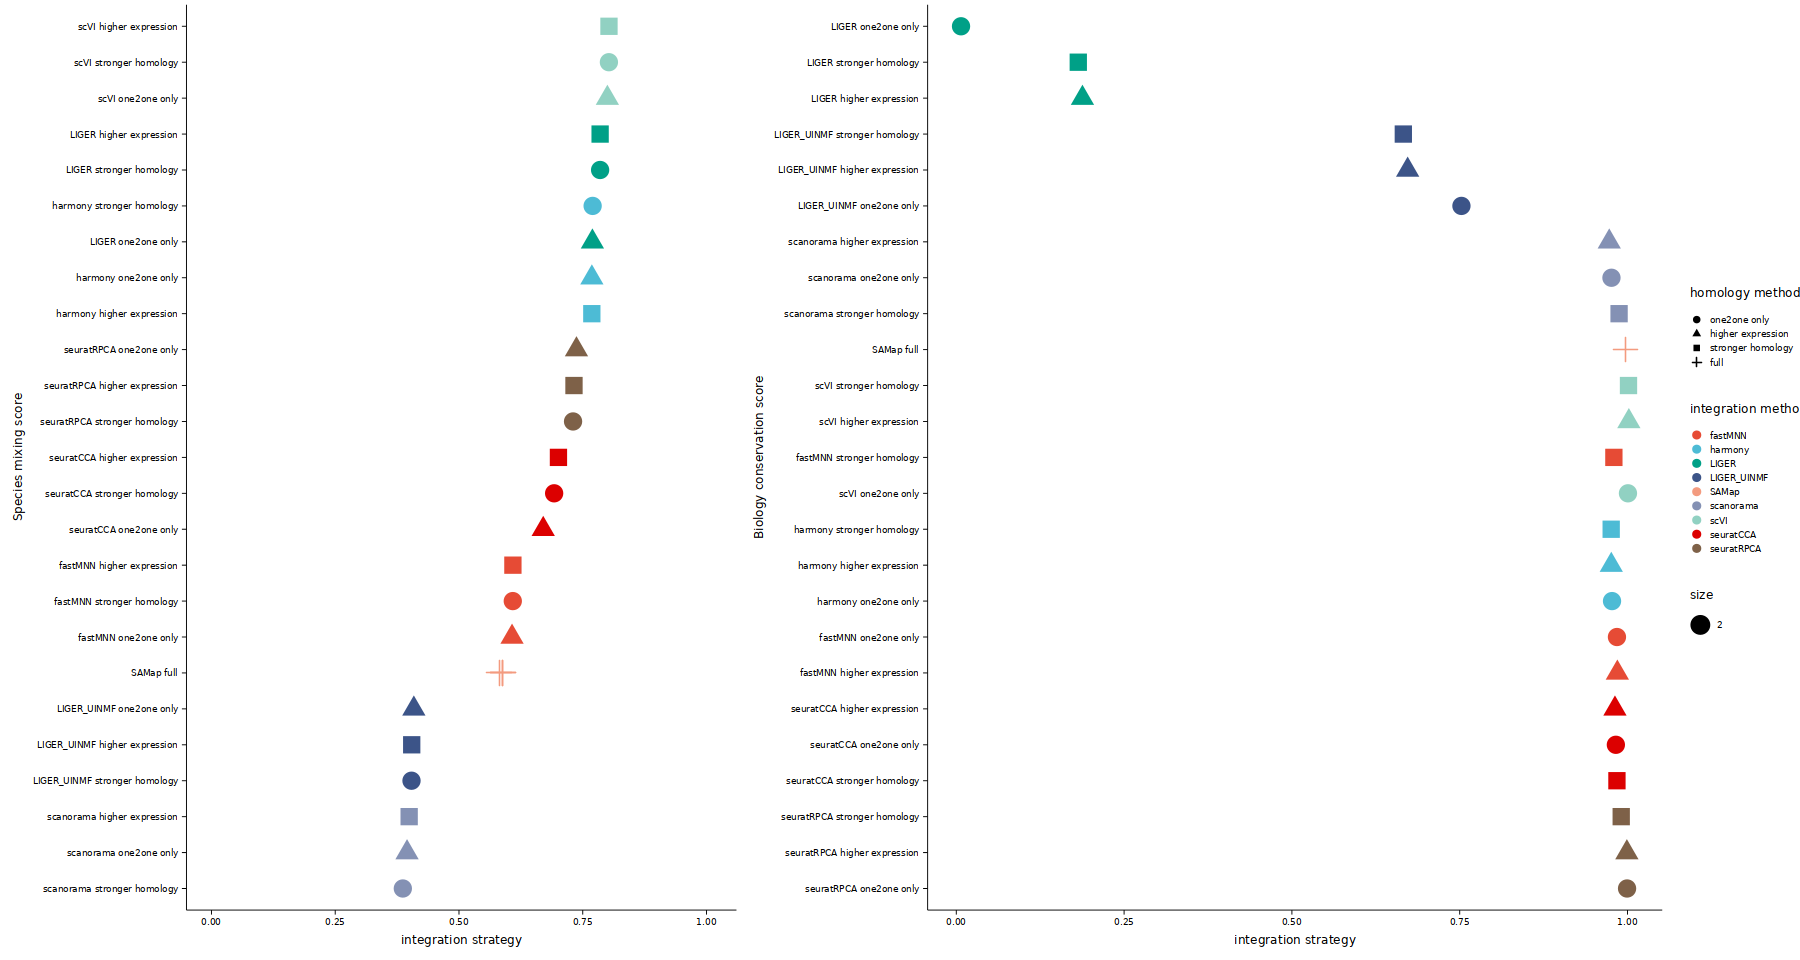

In [268]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_grid(batch + theme(legend.position = 'none'), bio, rel_widths = c(0.7, 1))

## overall ranking

In [269]:
batch_ranking = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>%
select(type, avg_score, integration_method, homology_method)

In [270]:
bio_ranking = bio_dd

In [271]:
merged = merge(batch_ranking, bio_ranking, by = 'type', suffixes = c("_batch", "_bio")) %>% distinct(type, .keep_all = TRUE) %>% 
mutate(total_score = 0.4*avg_score_batch + 0.6*avg_score_bio) %>% arrange(desc(total_score)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

merged

type,avg_score_batch,integration_method_batch,homology_method_batch,integration_method_bio,homology_method_bio,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,⋯,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score_bio,total_score,ranking
<chr>,<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
seuratRPCA one2one only,0.7373198,seuratRPCA,one2one only,seuratRPCA,one2one only,1.00000000,0.864931910,0.944601991,0.969256674,⋯,4,one2one only,seuratRPCA,0.0008936550,0.003037384,0.999330417,4,0.98840386,0.8879702,1
scVI one2one only,0.7997530,scVI,one2one only,scVI,one2one only,0.96173524,0.212861016,0.837957173,0.903442082,⋯,14,one2one only,scVI,0.0016906987,0.002508536,1.000675985,3,0.94634056,0.8877055,2
seuratRPCA higher expression,0.7323134,seuratRPCA,higher expression,seuratRPCA,higher expression,1.00000000,0.853921167,0.938775378,0.962683176,⋯,5,higher expression,seuratRPCA,0.0022462140,0.003149233,0.999045835,5,0.98700565,0.8851287,3
scVI higher expression,0.8030067,scVI,higher expression,scVI,higher expression,0.93707592,0.139257531,0.774964397,0.812248216,⋯,15,higher expression,scVI,0.0004589039,0.001991500,1.001991500,1,0.93477050,0.8820650,4
scVI stronger homology,0.8028658,scVI,stronger homology,scVI,stronger homology,0.93666604,0.139257531,0.774964397,0.812248216,⋯,15,stronger homology,scVI,0.0006279738,0.002197181,1.001468176,2,0.93433135,0.8817451,5
seuratRPCA stronger homology,0.7304307,seuratRPCA,stronger homology,seuratRPCA,stronger homology,1.00000000,0.847211431,0.938206063,0.961551771,⋯,6,stronger homology,seuratRPCA,0.0006279738,0.006460416,0.990621065,7,0.97984531,0.8800795,6
harmony one2one only,0.7684259,harmony,one2one only,harmony,one2one only,1.00000000,0.578124028,0.901203361,0.931046114,⋯,7,one2one only,harmony,0.0028258822,0.011843299,0.976925189,15,0.95205883,0.8786057,7
harmony stronger homology,0.7699918,harmony,stronger homology,harmony,stronger homology,1.00000000,0.578023749,0.888088459,0.928199597,⋯,9,stronger homology,harmony,0.0027534237,0.012333564,0.975677791,18,0.95025782,0.8781514,8
harmony higher expression,0.7683295,harmony,higher expression,harmony,higher expression,1.00000000,0.578045807,0.896713057,0.930254743,⋯,8,higher expression,harmony,0.0041301355,0.012278781,0.975817176,17,0.95090442,0.8778745,9


In [272]:
order_type = levels(factor(merged$type, levels = merged$type))

In [273]:
cb_platte_9

[1] "#332288" "#88CCEE" "#44AA99" "#117733" "#999933" "#DDCC77" "#CC6677"
[8] "#882255" "#AA4499"

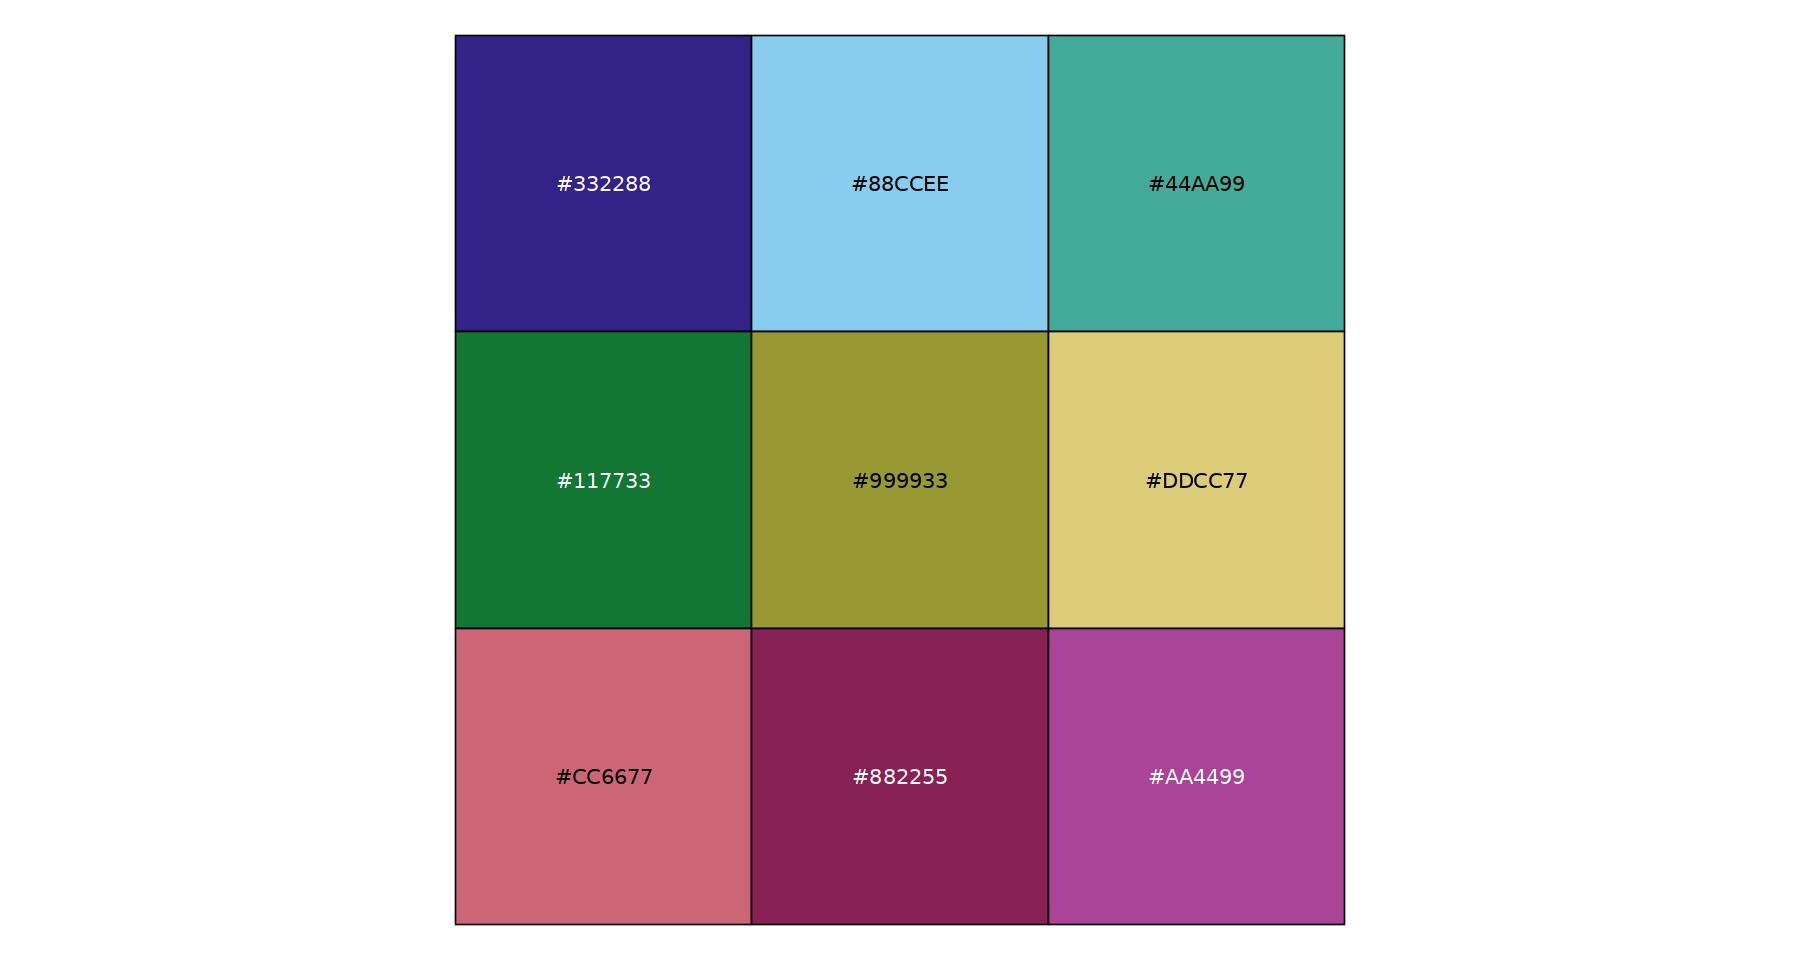

In [274]:
show_col(cb_platte_9)

## do not use color no.3 and no.7 together, use 1, 4, 7
## https://davidmathlogic.com/colorblind/#%23332288-%2388CCEE-%2344AA99-%23117733-%23999933-%23DDCC77-%23CC6677-%23882255-%23AA4499
## scale color npg is also ok
## https://davidmathlogic.com/colorblind/#%23E64B35-%234DBBD5-%2300A087-%233C5488-%23F39B7F-%238491B4-%2391D1C2-%23DC0000-%237E6148

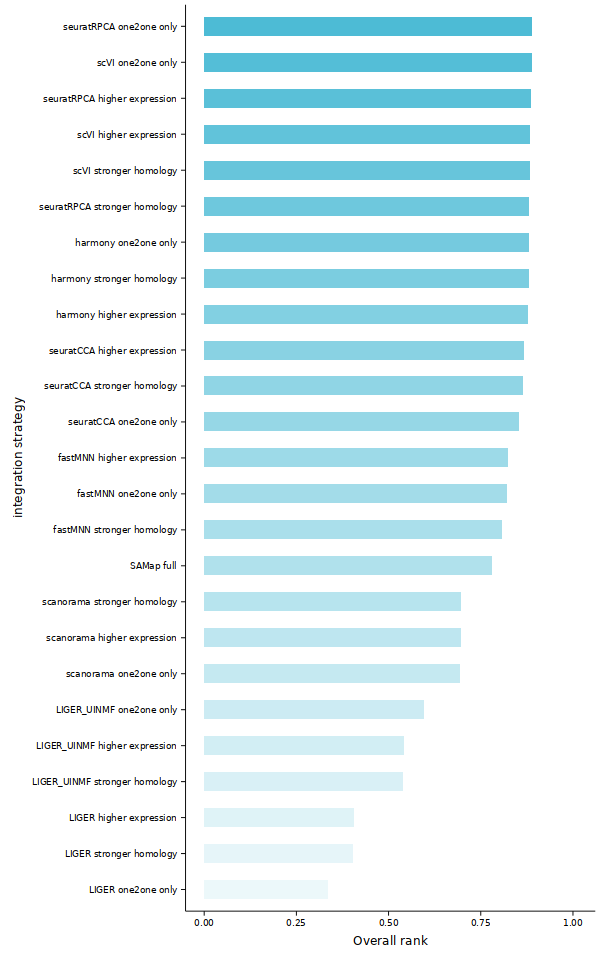

In [275]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = total_score, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## batch ranking

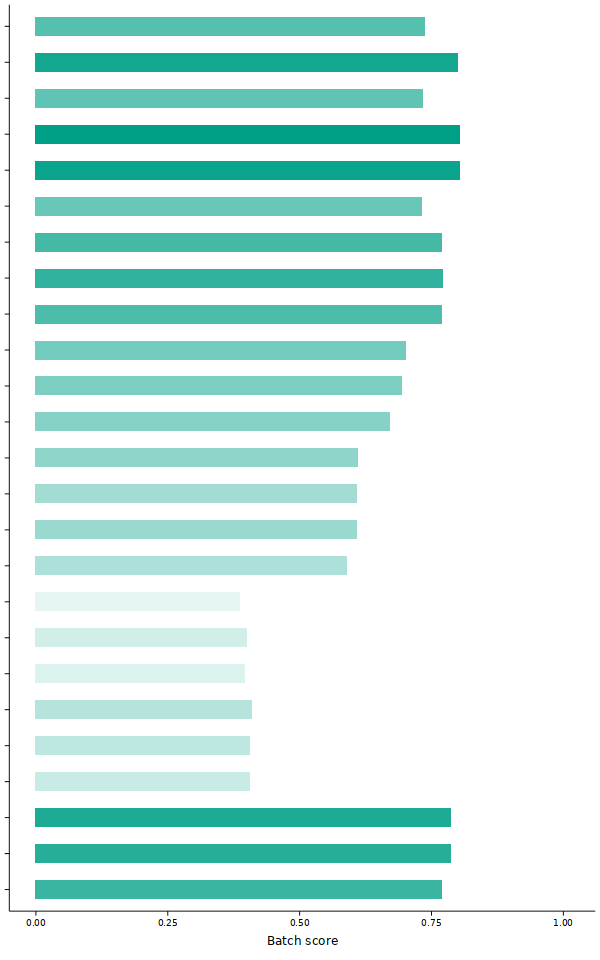

In [276]:
options(repr.plot.width = 5, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')


batch_overall = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(avg_score_rank = dense_rank(desc(avg_score))) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = avg_score, alpha = avg_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), panel.background = element_blank(), legend.position = 'none')

## batch scores

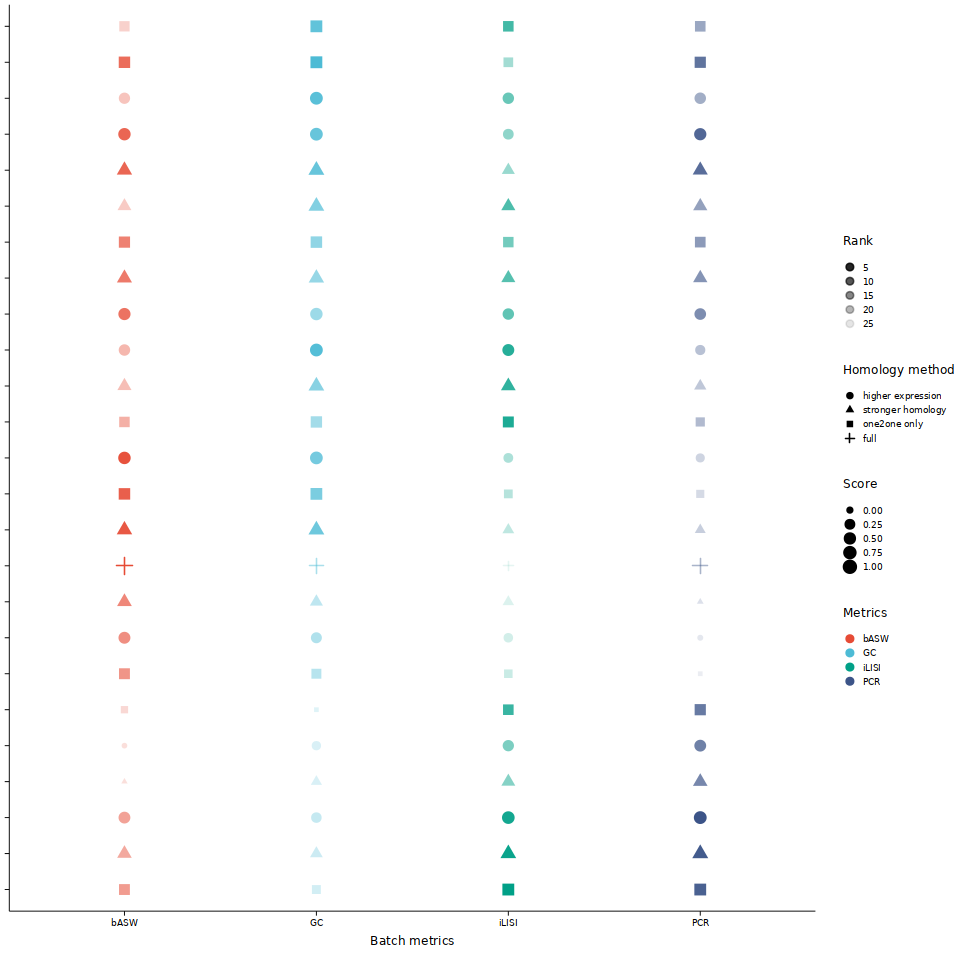

In [277]:
options(repr.plot.width = 8, repr.plot.height = 8)

ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) + 
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics') 

In [278]:
batch_detail = ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks') %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled, ifelse(grepl("graph", Metrics), graph_conn_scaled, ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled, pcr_scaled)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_rank", "bASW", Metrics)) %>% 
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(1, 3)) + labs(y = 'Batch metrics')

## Bio ranking

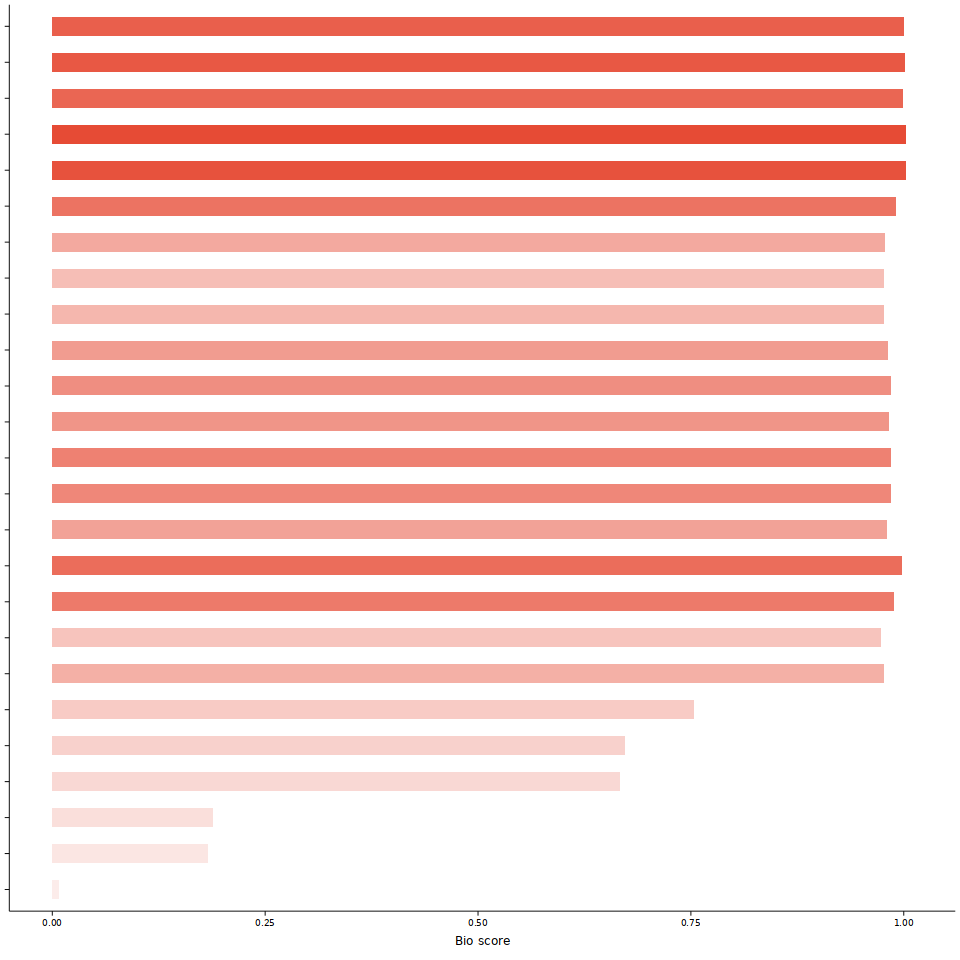

In [279]:
bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') + 
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

In [280]:
bio_overall = bio_ranking%>%
ggplot(aes(x = factor(type, levels = order_type), y = acc_loss_scaled, alpha =acc_loss_scaled_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width  = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +
scale_x_discrete(limits = rev) + scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## Bio scores

In [281]:
head(bio_ranking)

,type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,seuratRPCA one2one only,seuratRPCA,one2one only,1,0.8649319,0.9446020,0.9692567,1,4,4,4,one2one only,seuratRPCA,0.0008936550,0.003037384,0.9993304,4,0.9884039
2,seuratRPCA higher expression,seuratRPCA,higher expression,1,0.8539212,0.9387754,0.9626832,1,5,5,5,higher expression,seuratRPCA,0.0022462140,0.003149233,0.9990458,5,0.9870057
3,seuratRPCA stronger homology,seuratRPCA,stronger homology,1,0.8472114,0.9382061,0.9615518,1,6,6,6,stronger homology,seuratRPCA,0.0006279738,0.006460416,0.9906211,7,0.9798453
4,seuratCCA stronger homology,seuratCCA,stronger homology,1,0.9897039,0.8782918,0.9117984,1,3,12,12,stronger homology,seuratCCA,0.0077772142,0.008966208,0.9842455,11,0.9763861
5,seuratCCA one2one only,seuratCCA,one2one only,1,1.0000000,0.8816185,0.9137627,1,1,10,10,one2one only,seuratCCA,0.0079221312,0.009592735,0.9826514,12,0.9758902
6,seuratCCA higher expression,seuratCCA,higher expression,1,0.9938407,0.8797805,0.9136408,1,2,11,11,higher expression,seuratCCA,0.0120764196,0.010129169,0.9812865,13,0.9743923


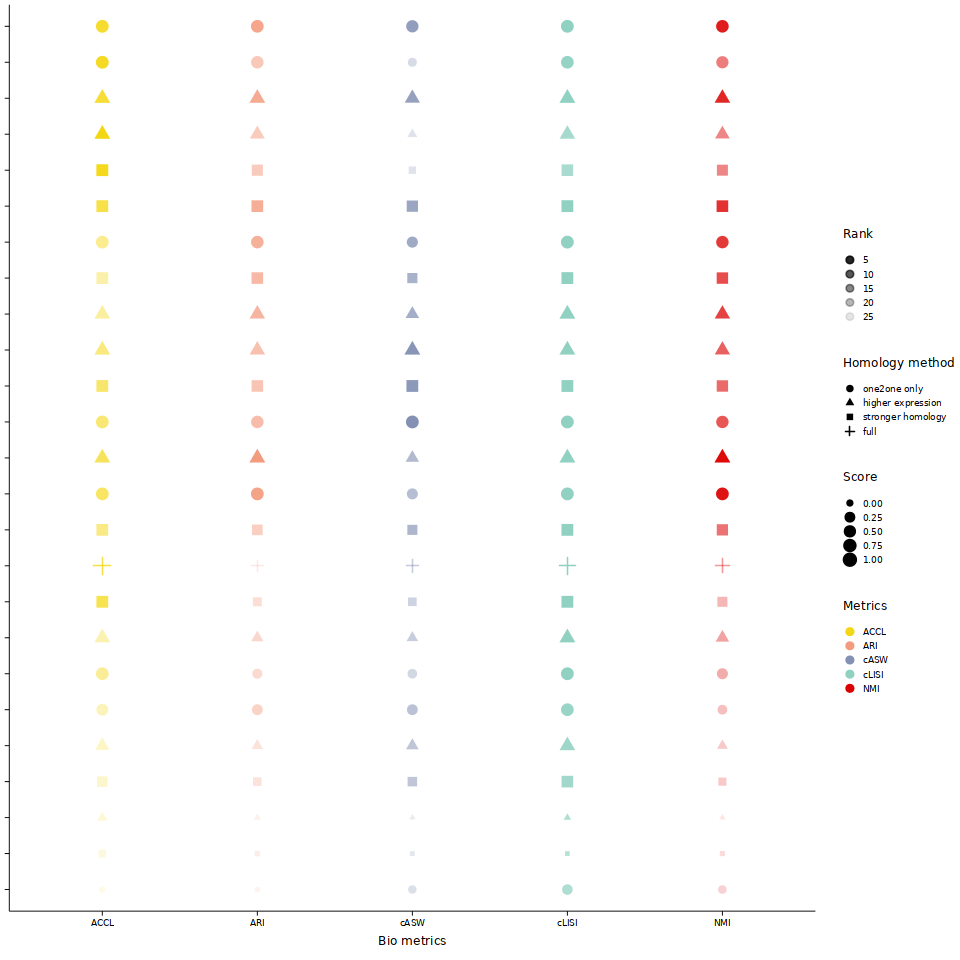

In [282]:
bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

In [283]:
bio_detail = bio_ranking %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled, ifelse(grepl("NMI", Metrics), NMI_scaled, ifelse(grepl("ARI", Metrics), ARI_scaled, ifelse(grepl("silhouette", Metrics), silhouette_scaled, acc_loss_scaled))))) %>%
mutate(Metrics = gsub("cLISI_scaled_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_rank", "ACCL", Metrics)) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = fct_inorder(homology_method))) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method', guide = 'none') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans(), guide = 'none') +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(1, 3), guide = 'none') + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF"))

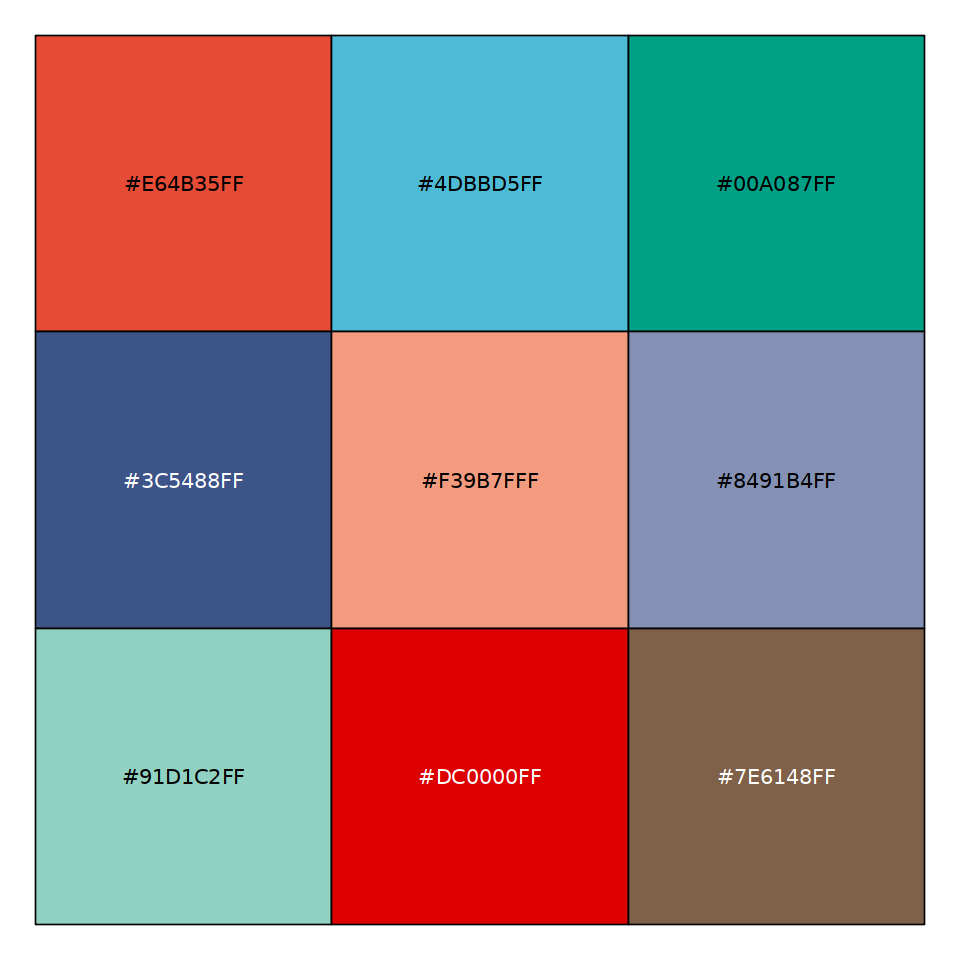

In [284]:
show_col(pal_npg("nrc")(9))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


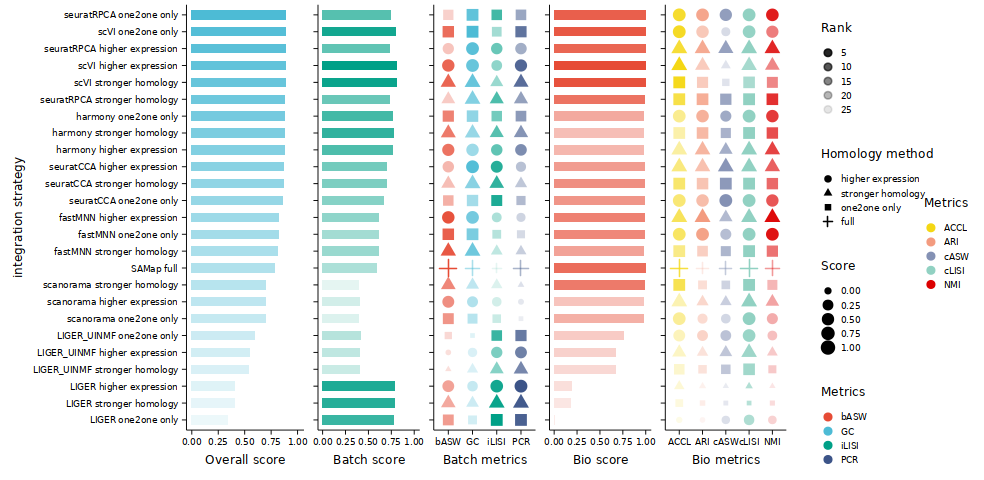

In [285]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

In [286]:
getwd()

[1] "/nfs/research/irene/ysong/RESULTS/NEXTFLOW/CROSS-SPECIES/Franjic_hippocampus_results_final_downsampled_ca1sub/batch_metrics/cross_species/analysis"

In [287]:
pdf("hippocampys_hs_ma_su_metrics.pdf", height  = 4, width = 8.2)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

dev.off()


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


png 
  2

In [288]:
ranked %>% mutate(type = paste(integration_method, homology_method, sep = " ")) %>% distinct(type, .keep_all = TRUE) %>% 
select(iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scaled, avg_score, type, homology_method,integration_method ) %>% 
ungroup() %>% 
mutate(iLISI_scaled_rank = dense_rank(desc(iLISI_scaled)))%>% 
mutate(graph_conn_scaled_rank = dense_rank(desc(graph_conn_scaled)))%>% 
mutate(pcr_scaled_rank = dense_rank(desc(pcr_scaled)))%>% 
mutate(silhouette_batch_scaled_rank = dense_rank(desc(silhouette_batch_scaled))) %>% write_csv("hippocampus_hs_ma_su_batch_ranked.csv")

In [289]:
bio_ranking  %>% write_csv("hippocampus_hs_ma_su_bio_ranked.csv")